In [1]:
from jax import numpy as np
from jax import random

In [2]:
key = random.PRNGKey(0)

Generate a mixture of Gaussians

In [3]:
key+=1

# How many centroids
n_centroids = 7


# define mean and variances of two Gaussians
m = random.cauchy(key, shape=(n_centroids, ))

s = random.gamma(key, a=3.0, shape=(n_centroids,))
s = 1/s
# m1 = -5.0; s1 = 1.5
# m2 = 2.0; s2 = 1.1
# m3 = 7.0; s3 = 1.3

In [4]:
# also define the weights
w = random.gamma(key, a=2.0, shape=(n_centroids,))# random positive variable
w/= np.sum(w) #normalize to 1

# number of samples
n_samples = 100000

In [5]:
w

DeviceArray([0.20022635, 0.22246024, 0.14083326, 0.01169012, 0.1802715 ,
             0.17816254, 0.06635594], dtype=float32)

In [6]:
w = np.array([1 for i in range(n_centroids)])
w/= np.sum(w)

In [7]:
s = np.sqrt(s)
s = np.sqrt(s)
print(s)

[0.6865938  0.6718145  0.73764986 1.1623713  0.7015589  0.70325065
 0.85518295]


In [8]:
m

DeviceArray([-2.0656042 ,  3.5624938 , -1.3922215 , -7.929985  ,
             -2.0041065 , -0.87387264, -1.0224373 ], dtype=float32)

In [9]:
# Generate some sample data, with proportions given by w1, w2, w3, ...
# Effect = np.concatenate(  for i in range(n_centroids))
Effect = np.concatenate([m[i] + s[i]*random.normal(key, (int(w[i]*n_samples),)) for i in range(n_centroids)])

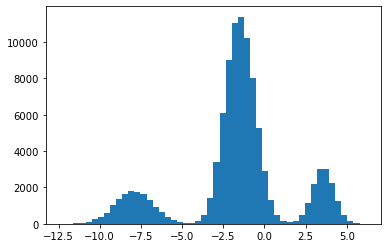

In [10]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(Effect, bins=50)
plt.show()

In [11]:
Effect.shape

(99995,)

In [12]:
# Sort the values and normalize them between 0 and 1

In [13]:
Effect = np.sort(Effect)
Effect-=np.min(Effect)
Effect/=np.max(Effect)

In [14]:
print(np.min(Effect))
print(np.max(Effect))

0.0
1.0


In [15]:
# Compute the empirical CDF

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

In [17]:
ecdf = ECDF(Effect)

In [18]:
Cause = ecdf(Effect)


Make x-y plot, also showing the densities.

Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

In [19]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Fixing random state for reproducibility
# np.random.seed(19680801)

# Cause in the x-axis, Effect in the y-axis
x = Cause
y = Effect

# Add Kernel Density Estimation for smoother densities on x and y
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)

xx = np.linspace(0, 1, 1000)

In [20]:
import seaborn as sns
sns.set_style("white")
# sns.axes_style("ticks")
# sns.axes_style("whitegrid")

In [21]:
import os

In [22]:
figure_path = "/Users/luigigresele/Documents/Plots_IMA"

In [23]:
from matplotlib.ticker import MaxNLocator

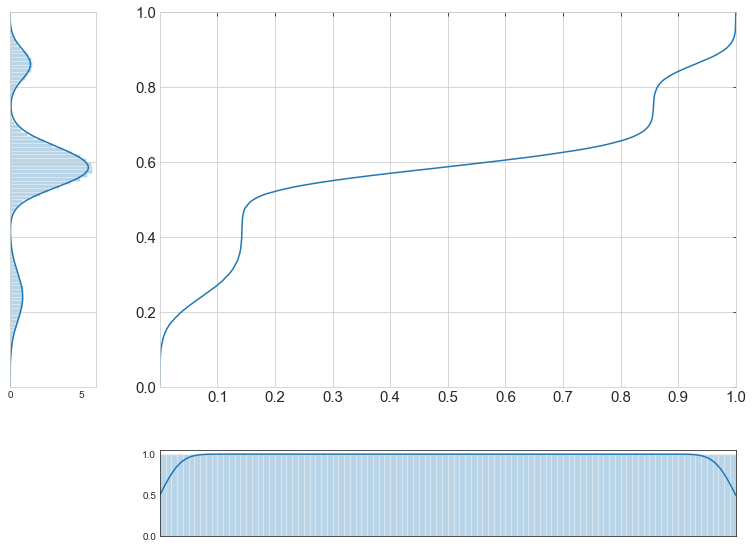

In [24]:
# definitions for the axes
left = 0.4
bottom = 0.4

# Width and height of the x-y plot
width, height = 1.0, 0.65

# Spacing between the axes of the x-y plot and the histograms:
spacing = 0.03


rect_scatter = [left, bottom, width, height]

# Distance from axes
distance = 0.23
# rect_histx = [left, bottom + height + spacing, width, 0.15]
# rect_histy = [left + width + spacing, bottom, 0.15, height]
rect_histx = [left, bottom - distance - spacing, width, 0.15]
rect_histy = [left - distance - spacing, bottom, 0.15, height]


# start with a rectangular Figure
plt.figure(figsize=(8, 8))

with sns.axes_style("whitegrid"):
    ax_scatter = plt.axes(rect_scatter)
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax_scatter.spines['left'].set_position('zero')
    ax_scatter.spines['bottom'].set_position('zero')
    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
ax_scatter.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
with sns.axes_style("whitegrid"):
    ax_histy = plt.axes(rect_histy)

ax_histy.yaxis.grid(True) # Hide the horizontal gridlines
ax_histy.xaxis.grid(False) # Show the vertical gridlines

ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
# ax_scatter.scatter(x, y)
with sns.axes_style("whitegrid"):
    ax_scatter.plot(x, y)

# now determine nice limits by hand:
binwidth = 0.01
lim = 1#np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((0, 1))
ax_scatter.set_ylim((0, 1))

bins = np.arange(0, 1+binwidth, binwidth)
ax_histx.hist(x, bins=bins, density=True, alpha=0.3)
# Add KDE plot of the density for x
ax_histx.plot(xx, kde_x(xx), color='C0')
ax_histy.hist(y, bins=bins, orientation='horizontal', density=True, alpha=0.3)
# Add KDE plot of the density for y
ax_histy.plot(kde_y(xx), xx, color='C0')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.savefig(os.path.join(figure_path, 'IGCI_plot'), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=True, bbox_inches='tight', pad_inches=0.1, metadata=None)

plt.show()